In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
heart_failure = pd.read_csv("/content/heart.csv")
heart_failure.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_failure.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_failure.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
heart_failure.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


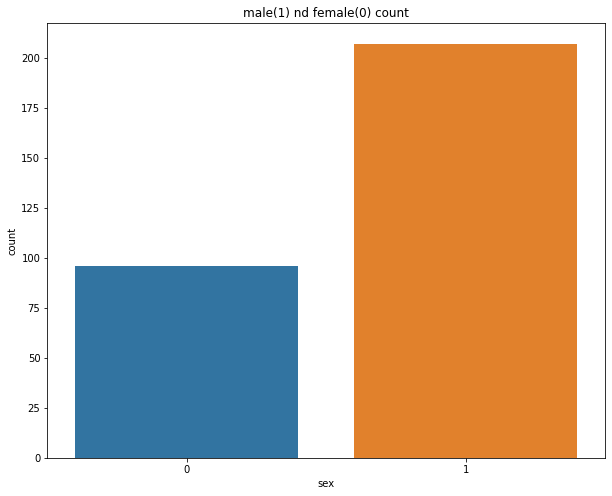

In [ ]:
plt.figure(figsize=(10,8))
plt.title("male(1) nd female(0) count")
sns.countplot(heart_failure['sex'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


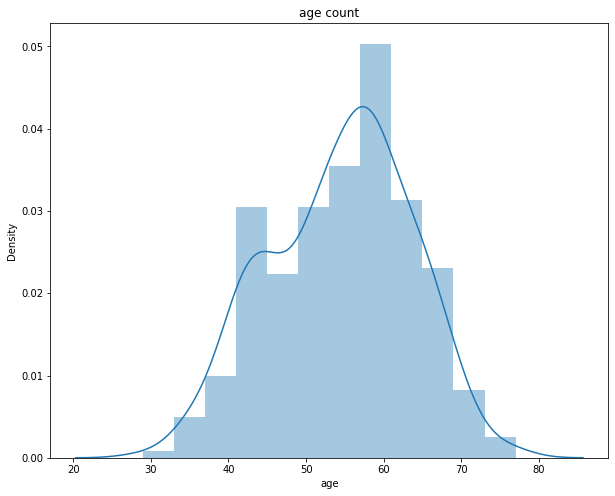

In [ ]:
plt.figure(figsize=(10,8))
plt.title("age count")
sns.distplot(heart_failure['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


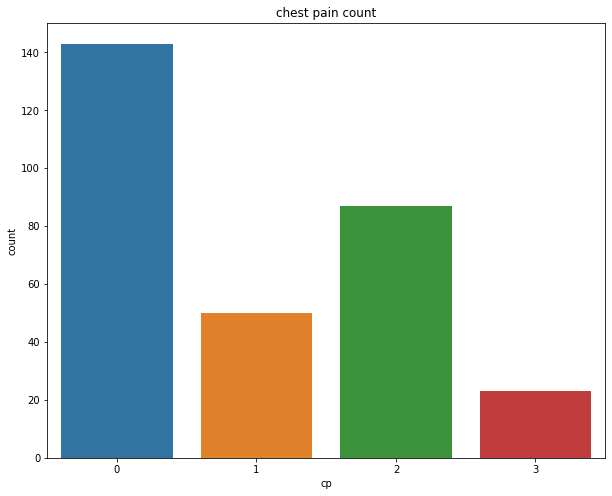

In [ ]:
plt.figure(figsize=(10,8))
plt.title("chest pain count")
sns.countplot(heart_failure['cp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


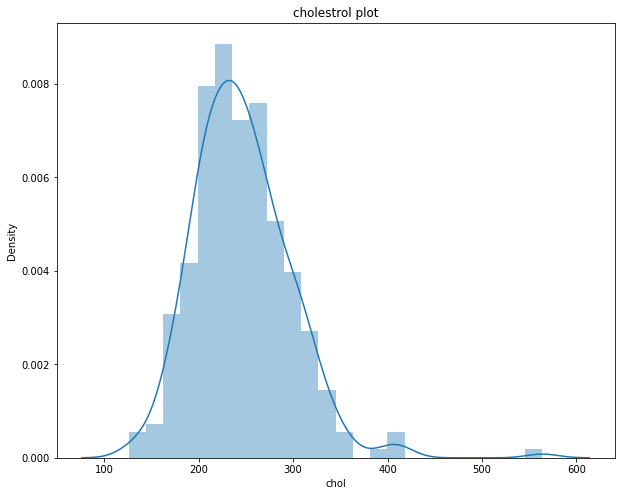

In [ ]:
plt.figure(figsize=(10,8))
plt.title("cholestrol plot")
sns.distplot(heart_failure['chol'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


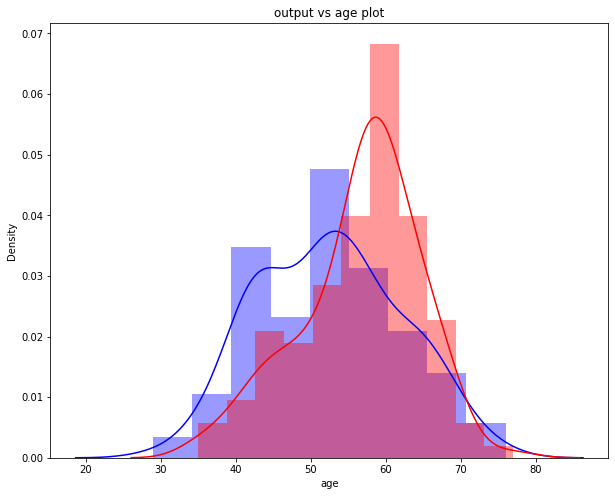

In [ ]:
plt.figure(figsize=(10,8))
plt.title("output vs age plot")
sns.distplot(heart_failure[heart_failure['output']==1]['age'],color="blue")
sns.distplot(heart_failure[heart_failure['output']==0]['age'],color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


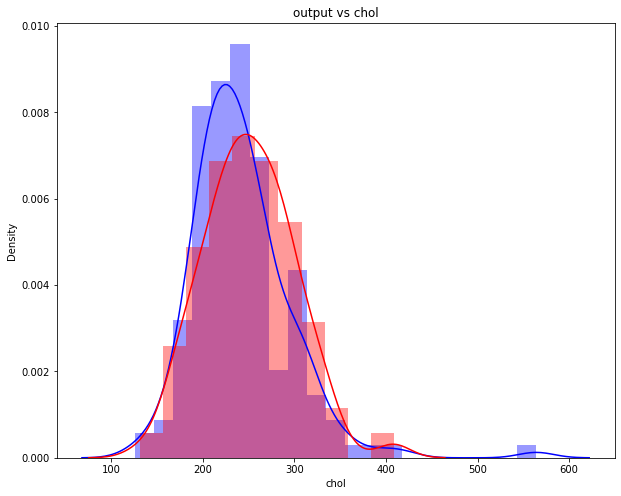

In [ ]:
plt.figure(figsize=(10,8))
plt.title("output vs chol")
sns.distplot(heart_failure[heart_failure['output']==1]['chol'],color="blue")
sns.distplot(heart_failure[heart_failure['output']==0]['chol'],color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


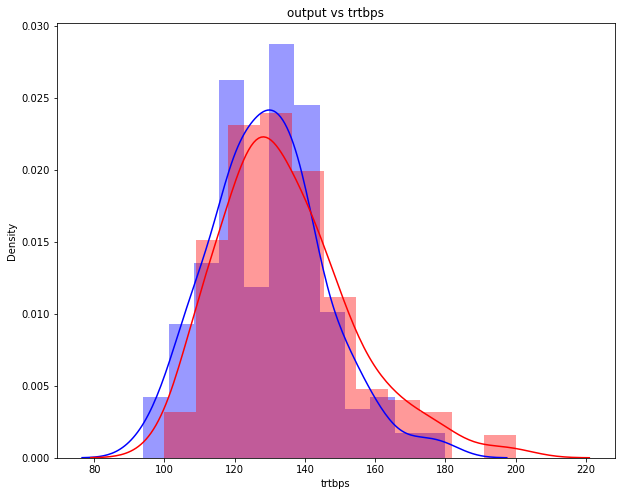

In [ ]:
plt.figure(figsize=(10,8))
plt.title("output vs trtbps")
sns.distplot(heart_failure[heart_failure['output']==1]['trtbps'],color="blue")
sns.distplot(heart_failure[heart_failure['output']==0]['trtbps'],color="red")

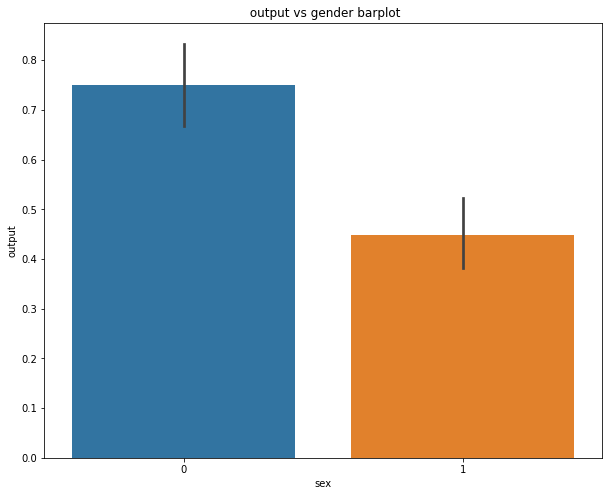

In [ ]:
plt.figure(figsize=(10,8))
plt.title(" output vs gender barplot")
sns.barplot(x=heart_failure['sex'],y=heart_failure['output'])

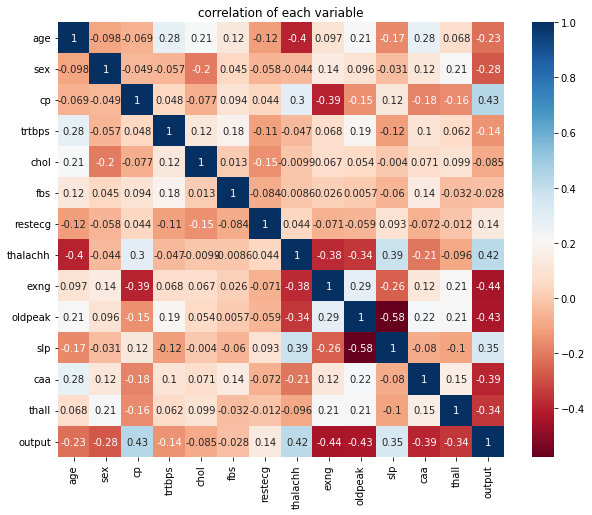

In [ ]:
plt.figure(figsize=(10,8))
plt.title("correlation of each variable")
sns.heatmap(heart_failure.corr(),annot=True,cmap='RdBu')

In [2]:
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
X = heart_failure.drop(columns = ['output'], axis= 1)
y=heart_failure['output']
X_train,X_test,y_train,y_test = train_test_split(X, y , random_state = 0)
Scaler=MinMaxScaler()
Scaler.fit(X_train)
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)


In [3]:
'''from sklearn.linear_model import LogisticRegression 
lm =LogisticRegression()
lm.fit(X_train,y_train)
prediction=lm.predict(X_test)
sc =accuracy_score(y_test,prediction)
print("accuracy of model=",sc*100)'''
from sklearn.naive_bayes import GaussianNB
lm = GaussianNB()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.8289473684210527

In [5]:

age = int(input('age'))
gender = int(input('1 for M and 0 for F '))
print('''1:typical angina 
2:atypical angina
3:non anginal pain
4:asymptomatic''')
cp = int(input('type of chest pain'))
#blood pressure
bp = int(input('blood pressure'))
chol = int(input('cholestrol'))
#fasting blood sugar (diabetic or not)
fbs = int(input(''' 1:if fbs>120
0:otherwise'''))
# normal heart rate
rest_ecg = int(input('''0:normal ecg
1:ST-T abnormality
2:left ventricular hypertrophy ESTES' criteria'''))
thalla = int(input('Max heart rate'))
# exercise induced chest pain
exng = int(input('''0:NO chest pain during exercise
1:chest pain during exercise'''))
# previous peak
old = float(input('previous peak'))
# slope 
slp = int(input('slope'))
# no. of major vessels blocked
caa = int(input('no. of major blood vessels blocked'))
# thall rate 
thall = int(input('thall rate'))
patient={"age":age,"sex":gender,"cp":cp,"trtbps":bp,"chol":chol,"fbs":fbs,"restecg":rest_ecg,"thalachh":thalla,"exng":exng,"oldpeak":old,"slp":slp,"caa":caa,"thall":[1]}
df1 = pd.DataFrame(patient)
df1

age63
1 for M and 0 for F 1
1:typical angina 
2:atypical angina
3:non anginal pain
4:asymptomatic
type of chest pain3
blood pressure145
cholestrol233
 1:if fbs>120
0:otherwise1
0:normal ecg
1:ST-T abnormality
2:left ventricular hypertrophy ESTES' criteria0
Max heart rate150
0:NO chest pain during exercise
1:chest pain during exercise0
previous peak2.3
slope0
no. of major blood vessels blocked0
thall rate1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [12]:
print('you have ',lm.predict_proba(df1)[0][0]*100,'% chance of heart attack')

you have  72.2927465142987 % chance of heart attack


In [ ]:
if(lm.predict(df1)==[1]):
 print("you are having more chance of heart attack")
else:
 print("you are having less chance of heart attack safe")

you are having more chance of heart attack
